In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rng = np.random.default_rng(1)

a_true = 100.
b_factor = 20.

a = rng.poisson(a_true, size=10000)
b = rng.poisson(a_true / b_factor, size=len(a)) * b_factor
b[b==0] = np.nan

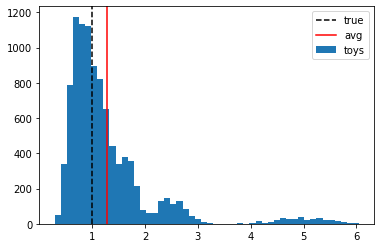

In [4]:
plt.hist(a / b, bins=50, label="toys")
plt.axvline(1, ls="--", color="k", label="true")
plt.axvline(np.nanmean(a/b), ls="-", color="r", label="avg")
plt.legend()

In [5]:
@np.vectorize
def ratio_bias(a, a_var, b, b_var):
    if np.isnan(a) or np.isnan(b) or a == 0 or b == 0:
        return np.nan

    scale_a = a_var / a
    n_eff_a = a / scale_a
    scale_b = b_var / b
    n_eff_b = b / scale_b

    rng = np.random.default_rng(1)
    a_toy = rng.poisson(n_eff_a, size=10000) * scale_a
    b_toy = rng.poisson(n_eff_b, size=len(a_toy)) * scale_b
    b_toy[b_toy == 0] = np.nan
    r_toy = np.nanmean(a_toy / b_toy)
    return r_toy / (a / b)

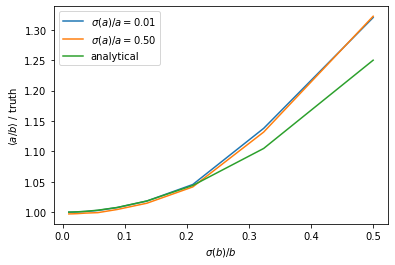

In [8]:
a = 10.
b = 10.

for a_rel_err in (0.01, 0.5):
    b_rel_err = np.geomspace(0.01, 0.5, 10)
    bias = ratio_bias(a, (a * a_rel_err) ** 2, b, (b * b_rel_err) ** 2)
    plt.plot(b_rel_err, bias, label=f"$\\sigma(a)/a = {a_rel_err:.2f}$")

# analytical formula for bias
bias = (1+b_rel_err**2)
plt.plot(b_rel_err, bias, label=f"analytical")

plt.ylabel(r"$\langle a/b \rangle$ / truth")
plt.xlabel(r"$\sigma(b)/b$")
plt.legend();

The analytical formula is a first order correction, therefore it fails to describe the bias for large relative uncertainties.